In [4]:
import numpy as np
from math import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [8]:
#number of x gridpts
n = 100
#number of timesteps
nt = 30
#road length
road = 5.0
#length of x step
dx = road/(n-1)

sigma = 1
dt = sigma*dx/v_max

x = np.linspace(0,5,n)

def flux(v_max, rho_max, rho):
    return v_max*rho*(1-rho/rho_max)

def d_flux(v_max, rho_max, rho):
    return v_max*rho*(1-rho/rho_max)

rho_max = 10.
v_max = 1.

rho_init = np.zeros(n)  # Before stoplight
rho_init[0] = 4.5
rho_init[1] = 5.

rho_n = np.zeros((nt,len(rho_init)))      
#copy the initial u array into each row of our new array
rho_n[:,:] = rho_init.copy()              
rho = rho_init

for t in range(1,nt):
    F = flux(v_max, rho_max, rho)
    J = d_flux(v_max, rho_max, rho)
    
#lax-wendroff scheme
    rho_n[t,1:-1] = rho[1:-1] - dt/(2*dx)*(F[2:]-F[:-2]) \
                       + dt**2/(4*dx**2) * ( (J[2:]+J[1:-1])*(F[2:]-F[1:-1]) \
                       - (J[1:-1]+J[:-2])*(F[1:-1]-F[:-2]) )

    rho_n[t,0] = rho[0]
    rho_n[t,-1] = rho[-1]
    rho = rho_n[t].copy()

print rho_n

[[ 4.5         5.          0.         ...,  0.          0.          0.        ]
 [ 4.5         4.64390625  2.8125     ...,  0.          0.          0.        ]
 [ 4.5         4.33029038  3.55965018 ...,  0.          0.          0.        ]
 ..., 
 [ 4.5         4.43029877  4.33285882 ...,  0.          0.          0.        ]
 [ 4.5         4.43443263  4.34179181 ...,  0.          0.          0.        ]
 [ 4.5         4.43827031  4.35015203 ...,  0.          0.          0.        ]]


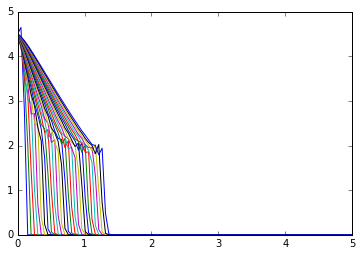

In [10]:
for i in range(1,nt):
    plt.plot(x,rho_n[i])
plt.show()